In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error


In [3]:

df = pd.DataFrame(abs(make_classification(1000)[0])[:,:2], columns=['f1', 'f2'])
df_train = df.head(800)
df_test = df.drop(df_train.index)
df_train['prob'] = 1/(1+np.e**(-(0.36*df_train.f1+0.77*df_train.f2-5.24)))
df_train.to_csv('prob_train.csv'),df_test.to_csv('prob_test.csv')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(None, None)

In [4]:
df_train = pd.read_csv('prob_train.csv', index_col=0)
df_test = pd.read_csv('prob_test.csv', index_col=0)
df_test

,f1,f2
800,0.062661,0.313513
801,0.109632,0.515348
802,1.000972,0.679684
803,1.208431,0.106724
804,0.772322,0.557583
...,...,...
995,0.315920,0.797871
996,0.781790,0.691421
997,0.748698,1.390850
998,0.561955,1.063516


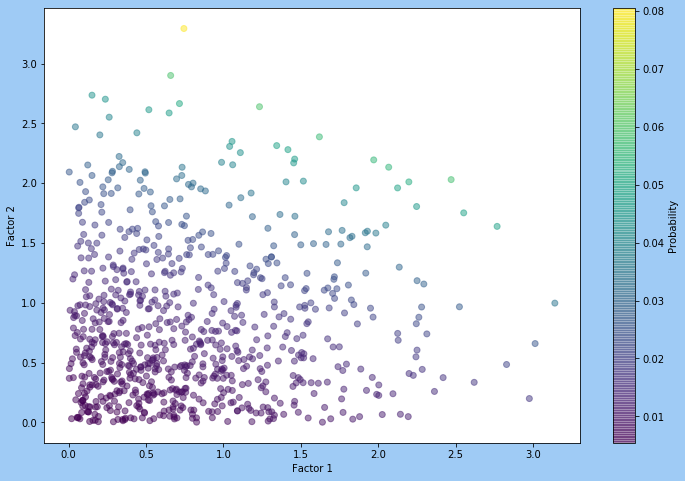

In [5]:

fig, ax = plt.subplots(figsize=(12,8))
sct = ax.scatter(df_train.f1, df_train.f2, c=df_train.prob, alpha=0.5)
fig.set_facecolor('#9fcbf5')
plt.colorbar(sct, ax=ax, label="Probability")
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

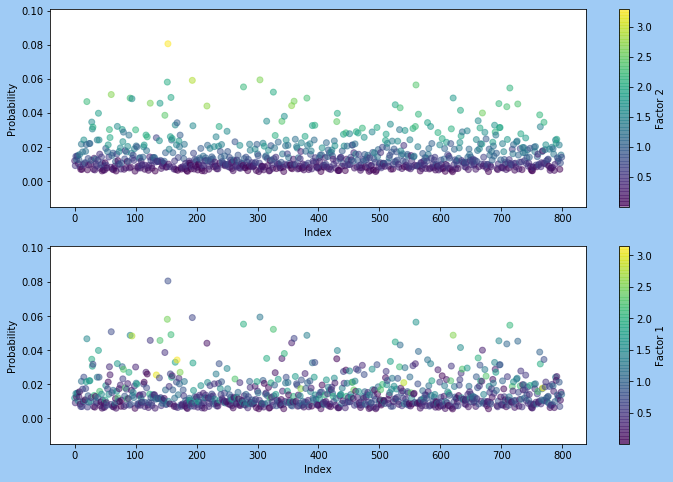

In [6]:
fig, ax = plt.subplots(2,figsize=(12,8))
sct1 = ax[0].scatter(df_train.index, df_train.prob, c=df_train.f2, alpha=0.5)
sct2 = ax[1].scatter(df_train.index, df_train.prob, c=df_train.f1, alpha=0.5)
ax[0].set_xlabel('Index')
ax[1].set_xlabel('Index')
ax[0].set_ylabel('Probability')
ax[1].set_ylabel('Probability')
fig.set_facecolor('#9fcbf5')
plt.colorbar(sct1, ax=ax[0], label="Factor 2")
plt.colorbar(sct2, ax=ax[1], label="Factor 1")
plt.show()

In [7]:
# np.log = log(data/1-data)
df_train['func'] = np.log(df_train.prob/(1-df_train.prob))
model = LinearRegression().fit(df_train[['f1','f2']], df_train.func)

In [8]:
model.coef_, model.intercept_

(array([0.36, 0.77]), -5.239999999999998)

In [9]:
y_pred = np.dot(df_test[['f1','f2']], model.coef_.T) + model.intercept_
pd.DataFrame(y_pred).head(5)

,0
0,-4.976037
1,-4.803714
2,-4.356294
3,-4.722787
4,-4.532625


In [10]:
yt_pred = model.predict(df_train[['f1','f2']])
df_train['yt_pred'] = 1/(1+np.e**(-yt_pred))
df_train

,f1,f2,prob,func,yt_pred
0,1.567595,0.331772,0.011889,-4.420201,0.011889
1,0.411621,0.512588,0.009039,-4.697124,0.009039
2,1.287398,0.723173,0.014490,-4.219694,0.014490
3,0.196401,1.030883,0.012425,-4.375516,0.012425
4,1.795296,0.487073,0.014505,-4.218647,0.014505
...,...,...,...,...,...
795,0.902418,1.403678,0.021159,-3.834298,0.021159
796,0.684212,0.028615,0.006884,-4.971650,0.006884
797,0.172495,0.832301,0.010592,-4.537030,0.010592
798,0.222121,1.289811,0.015264,-4.166882,0.015264


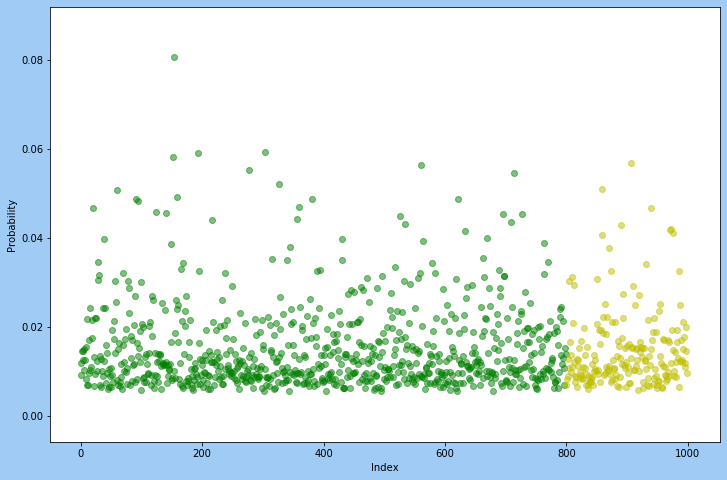

In [12]:
y_pred = np.dot(df_test[['f1','f2']], model.coef_.T) + model.intercept_
y_pred = 1/(1+np.e**(-y_pred))
df_test['y_pred'] = y_pred

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df_train.index, df_train.prob, c='g', alpha=0.5)
ax.scatter(df_test.index, df_test.y_pred, c='y', alpha=0.5)
ax.set_xlabel('Index')
ax.set_ylabel('Probability')
fig.set_facecolor('#9fcbf5')
plt.show()